# **SVM算法实现**

## **实验目标**

通过本案例的学习和课后作业的练习：

1. 了解SVM算法的基本思想；
2. 能够使用SKlearn实现SVM算法。

你也可以将本案例相关的 ipynb 学习笔记分享到[ AI Gallery Notebook](https://marketplace.huaweicloud.com/markets/aihub/notebook/list/) 版块获得[成长值](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=9b8d7e7a-a150-449e-ac17-2dcf76d8b492)，分享方法请查看[此文档](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=8afec58a-b797-4bf9-acca-76ed512a3acb)。

## **案例内容介绍**

支持向量机（Support Vector Machine, SVM）是一类按监督学习方式对数据进行二元分类的广义线性分类器，其决策边界是对学习样本求解的最大边距超平面。

**SVM算法的优缺点：**

优点：

1.使用核函数可以向高维空间进行映射

2.使用核函数可以解决非线性的分类

3.分类思想很简单，就是将样本与决策面的间隔最大化

4.分类效果较好

缺点：

1.SVM算法对大规模训练样本难以实施

2.用SVM解决多分类问题存在困难

3.对缺失数据敏感，对参数和核函数的选择敏感

本案例推荐的理论学习视频：

- [《AI技术领域课程--机器学习》 SVM ](https://education.huaweicloud.com/courses/course-v1:HuaweiX+CBUCNXE086+Self-paced/courseware/7e9fb44d1008469d830d2be2ba41b090/0012bf7185534190bd6245f35ecdff0f/)  

## **注意事项**

1. 如果您是第一次使用 JupyterLab，请查看[《ModelArts JupyterLab使用指导》](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=03676d0a-0630-4a3f-b62c-07fba43d2857)了解使用方法；

2. 如果您在使用 JupyterLab 过程中碰到报错，请参考[《ModelArts JupyterLab常见问题解决办法》](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=9ad8ce7d-06f7-4394-80ef-4dbf6cfb4be1)尝试解决问题。

## **实验步骤**

### 1、导入相关的方法

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import moxing as mox
from sklearn import svm
%matplotlib inline

INFO:root:Using MoXing-v1.17.3-
INFO:root:Using OBS-Python-SDK-3.20.7


### 2、对文件进行逐行解析，从而得到第行的类标签和整个数据矩阵

In [2]:
def loadDataSet(fileName):
    """
    Args:
        fileName 文件名
    Returns:
        dataMat  数据矩阵
        labelMat 类标签
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat


if not os.path.exists('testSet.txt'):
    mox.file.copy('obs://modelarts-labs-bj4-v2/course/hwc_edu/machine_learning/datasets/SVM/testSet.txt', 'testSet.txt')
X, Y = loadDataSet('./testSet.txt')
X = np.mat(X)

### 3、可视化数据集

In [3]:
print("X=", X[:5])
print("Y=", Y[:5])

X= [[ 3.542485e+00  1.977398e+00]
 [ 3.018896e+00  2.556416e+00]
 [ 7.551510e+00 -1.580030e+00]
 [ 2.114999e+00 -4.466000e-03]
 [ 8.127113e+00  1.274372e+00]]
Y= [-1.0, -1.0, 1.0, -1.0, 1.0]


拟合一个SVM模型

C越大 惩罚越大，越容易过拟合
grid search

### 4、训练模型

In [4]:
clf = svm.SVC(C=5, kernel='linear', gamma=10)
clf.fit(X, Y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# 获取分割超平面
w = clf.coef_[0]
# 斜率
a = -w[0] / w[1]
# 从-2到10，顺序间隔采样50个样本，默认是num=50
xx = np.linspace(-2, 10)  # , num=50)
# 二维的直线方程
yy = a * xx - (clf.intercept_[0]) / w[1]
print("yy=", yy)

yy= [-20.04314604 -19.31185381 -18.58056159 -17.84926936 -17.11797714
 -16.38668492 -15.65539269 -14.92410047 -14.19280824 -13.46151602
 -12.7302238  -11.99893157 -11.26763935 -10.53634713  -9.8050549
  -9.07376268  -8.34247045  -7.61117823  -6.87988601  -6.14859378
  -5.41730156  -4.68600933  -3.95471711  -3.22342489  -2.49213266
  -1.76084044  -1.02954821  -0.29825599   0.43303623   1.16432846
   1.89562068   2.6269129    3.35820513   4.08949735   4.82078958
   5.5520818    6.28337402   7.01466625   7.74595847   8.4772507
   9.20854292   9.93983514  10.67112737  11.40241959  12.13371182
  12.86500404  13.59629626  14.32758849  15.05888071  15.79017294]


### 5、通过支持向量绘制分割超平面

In [6]:
print("support_vectors_=", clf.support_vectors_)
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

support_vectors_= [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]


### 6、画出直线，散点以及临界点的支持向量平面

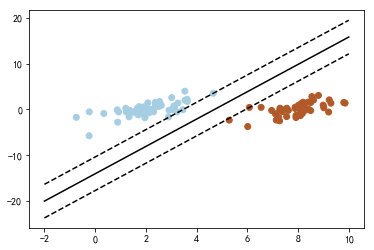

In [7]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.scatter(X[:, 0].flat, X[:, 1].flat, c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

以上是 SVM 的实现方法，受限于篇幅原因，本案例未完全覆盖 SVM 的全部操作，欢迎你将更全面的 SVM 学习笔记分享到[ AI Gallery Notebook](https://marketplace.huaweicloud.com/markets/aihub/notebook/list/) 版块获得[成长值](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=9b8d7e7a-a150-449e-ac17-2dcf76d8b492)，分享方法请查看[此文档](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=8afec58a-b797-4bf9-acca-76ed512a3acb)。

## **作业**

请你利用本实验中学到的知识点，完成以下编程题：

1. [请你尝试修改 SVC() 函数的 C（惩罚系数） 参数的不同取值，看看该参数的修改对模型会有怎样的影响。](https://marketplace.huaweicloud.com/markets/aihub/notebook/detail/?id=062ad1fc-e08a-4419-81ab-2e059e2a4826)
2. [请你尝试修改 SVC() 函数的 probability（是否采用概率估计） 参数的不同取值，看看该参数的修改对模型会有怎样的影响。](https://marketplace.huaweicloud.com/markets/aihub/notebook/detail/?id=63cae5e3-d164-4d96-86b9-20d1d46bce74)
3. [使用手写数字数据集，基于Sklearn框架实现一个SVM手写数字分类模型。](https://marketplace.huaweicloud.com/markets/aihub/notebook/detail/?id=68914250-7096-463f-a475-8997e404b03d)